In [1]:
#imports
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#carregando o arquivo
df = pd.read_excel("dataset/default of credit card clients.xls", header=1)

In [42]:
#renomear coluna target para nome mais amigável
df.rename(columns={"default payment next month": "target"}, inplace=True)

In [43]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [44]:
#separar features de target
X = df.drop(columns=["ID", "target"])
Y = df["target"]

In [45]:
#dividir oem conjunto de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [46]:
#padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [47]:
# Lista de valores de n_neighbors
n_neighbors_list = [3, 5, 10, 15, 20, 30, 50, 60, 75]

In [48]:
# Dicionário para armazenar as acurácias
accuracy_results = {}

In [49]:
# Treinar modelos e calcular acurácia
for n in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, Y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracy_results[n] = accuracy

In [50]:
# Exibir os resultados
for n, acc in accuracy_results.items():
    print(f"n_neighbors = {n}: Acurácia = {acc:.4f}")

n_neighbors = 3: Acurácia = 0.7750
n_neighbors = 5: Acurácia = 0.7930
n_neighbors = 10: Acurácia = 0.8085
n_neighbors = 15: Acurácia = 0.8063
n_neighbors = 20: Acurácia = 0.8085
n_neighbors = 30: Acurácia = 0.8070
n_neighbors = 50: Acurácia = 0.8092
n_neighbors = 60: Acurácia = 0.8103
n_neighbors = 75: Acurácia = 0.8060


In [51]:
# Listas de hiperparâmetros para Random Forest
max_depths_list = [5, 10, None]
max_features_list = [0.05, 0.1, 'sqrt']

In [52]:
# Dicionário para armazenar as acurácias do Random Forest
accuracy_results_rf = {}

In [53]:
# Treinar modelos Random Forest e calcular acurácia
for max_depth in max_depths_list:
    for max_features in max_features_list:
        rf = RandomForestClassifier(max_depth=max_depth, max_features=max_features, random_state=42)
        rf.fit(X_train, Y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(Y_test, y_pred)
        accuracy_results_rf[(max_depth, max_features)] = accuracy

In [54]:
# Exibir os resultados do Random Forest
for params, acc in accuracy_results_rf.items():
    print(f"Random Forest - max_depth = {params[0]}, max_features = {params[1]}: Acurácia = {acc:.4f}")

Random Forest - max_depth = 5, max_features = 0.05: Acurácia = 0.7990
Random Forest - max_depth = 5, max_features = 0.1: Acurácia = 0.8027
Random Forest - max_depth = 5, max_features = sqrt: Acurácia = 0.8122
Random Forest - max_depth = 10, max_features = 0.05: Acurácia = 0.8077
Random Forest - max_depth = 10, max_features = 0.1: Acurácia = 0.8098
Random Forest - max_depth = 10, max_features = sqrt: Acurácia = 0.8170
Random Forest - max_depth = None, max_features = 0.05: Acurácia = 0.8078
Random Forest - max_depth = None, max_features = 0.1: Acurácia = 0.8142
Random Forest - max_depth = None, max_features = sqrt: Acurácia = 0.8120


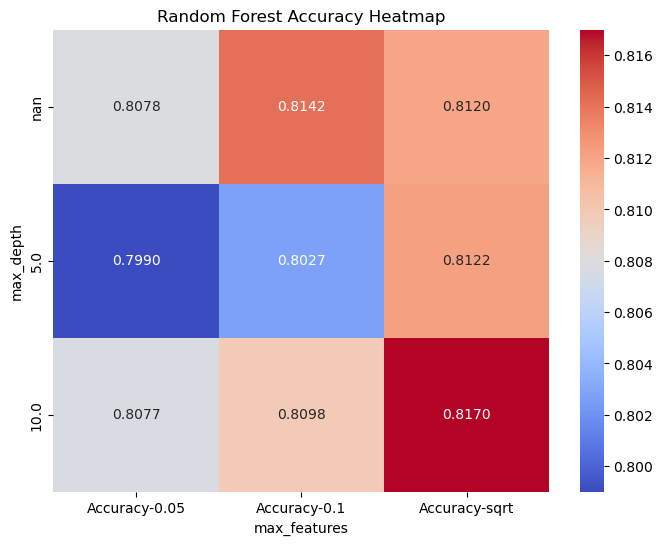

In [55]:
# Criar heatmap para os resultados do Random Forest
heatmap_data = pd.DataFrame(accuracy_results_rf.values(), 
                            index=pd.MultiIndex.from_tuples(accuracy_results_rf.keys(), names=["max_depth", "max_features"]), 
                            columns=["Accuracy"]).unstack(level=1)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Random Forest Accuracy Heatmap")
plt.xlabel("max_features")
plt.ylabel("max_depth")
plt.show()

In [56]:
# Parâmetros para Grid Search no Random Forest
param_grid = {
    'max_depth': [5, 10, None],
    'max_features': [0.05, 0.1, 'sqrt']
}

In [57]:
# Criar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

In [58]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': [0.05, 0.1, 'sqrt']},
             scoring='accuracy')

In [59]:
# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [60]:
# Avaliar no conjunto de teste
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Melhor modelo Random Forest - Parâmetros: {best_params}, Acurácia: {accuracy:.4f}")

Melhor modelo Random Forest - Parâmetros: {'max_depth': 10, 'max_features': 'sqrt'}, Acurácia: 0.8170


/home/jorge/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


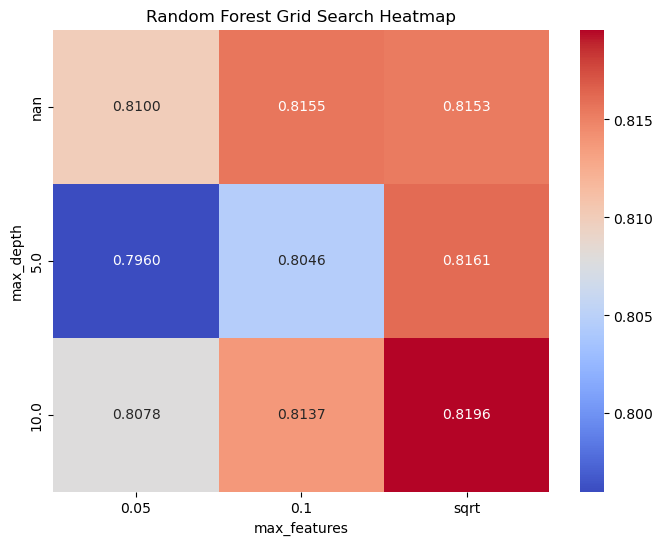

In [61]:
# Criar heatmap para os resultados do Grid Search
results_df = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results_df.pivot(index='param_max_depth', columns='param_max_features', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Random Forest Grid Search Heatmap")
plt.xlabel("max_features")
plt.ylabel("max_depth")
plt.show()

In [62]:
# Definir o espaço de busca para Random Search
max_depth_list = np.arange(1, 101)  # Profundidade de 1 a 100
max_features = np.linspace(0.001, 0.5, 100)  # Proporção de features utilizadas
parameter_grid = {
    'max_depth': max_depth_list,
    'max_features': max_features
}
number_iterations = 10  # Número de combinações testadas


In [63]:
# Criar o modelo Random Forest
rf = RandomForestClassifier(random_state=42)

In [64]:
# Configurar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parameter_grid,
    scoring='accuracy',
    n_iter=number_iterations,
    return_train_score=True,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,...
       0.35382828, 0.35886869, 0.36390909, 0.36894949, 0.3739899 ,
       0.3790303 , 0.38407071, 0.38911111, 0.39415152, 0.39919192,
       0.40423232, 0.40927273, 0.41431313, 0.41935354, 0.42439394,
       0.42943434, 0.43447475, 0.43951515, 0.44455556, 0.44959596,
       0.45463636, 0.45967677, 0.46471717, 0.46975758, 0.47479798,
       0.47983838, 0.48487879, 0.48991919, 0.4949596 , 0.5       ])},
         

In [65]:
# Melhor combinação de hiperparâmetros
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [67]:
# Avaliar no conjunto de teste
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Melhor modelo Random Forest - Parâmetros: {best_params}, Acurácia: {accuracy:.4f}")

Melhor modelo Random Forest - Parâmetros: {'max_features': 0.33366666666666667, 'max_depth': 5}, Acurácia: 0.8180


/home/jorge/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


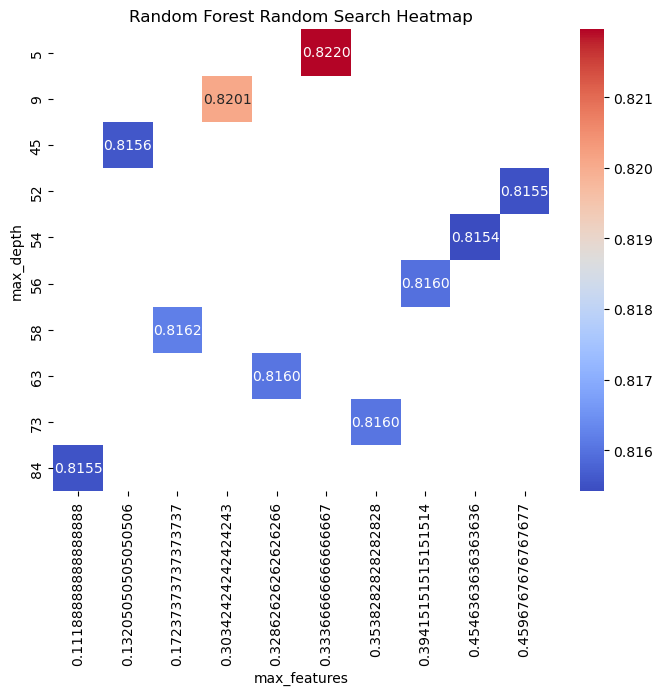

In [68]:
# Criar heatmap para os resultados do Random Search
results_df = pd.DataFrame(random_search.cv_results_)
heatmap_data = results_df.pivot(index='param_max_depth', columns='param_max_features', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Random Forest Random Search Heatmap")
plt.xlabel("max_features")
plt.ylabel("max_depth")
plt.show()